In [64]:
# Machine Learning - Titanic Logistic Regression

In [65]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [66]:
# Cargamos el dataset 
titanic = pd.read_csv("C:\\Users\\abuen\\OneDrive\\00 - BUSINNESS INTELLIGENCE\\MODULO_2\\DATASET\\titanic.csv")

In [67]:
# Visualizamos las primeras filas del dataset
print(titanic.head())

   Unnamed: 0  survived  pclass     sex   age  sibsp  parch     fare embarked  \
0           0         0       3    male  22.0      1      0   7.2500        S   
1           1         1       1  female  38.0      1      0  71.2833        C   
2           2         1       3  female  26.0      0      0   7.9250        S   
3           3         1       1  female  35.0      1      0  53.1000        S   
4           4         0       3    male  35.0      0      0   8.0500        S   

   class    who  adult_male deck  embark_town alive  alone  
0  Third    man        True  NaN  Southampton    no  False  
1  First  woman       False    C    Cherbourg   yes  False  
2  Third  woman       False  NaN  Southampton   yes   True  
3  First  woman       False    C  Southampton   yes  False  
4  Third    man        True  NaN  Southampton    no   True  


In [68]:
# Visualizamos la información del dataset
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB
None


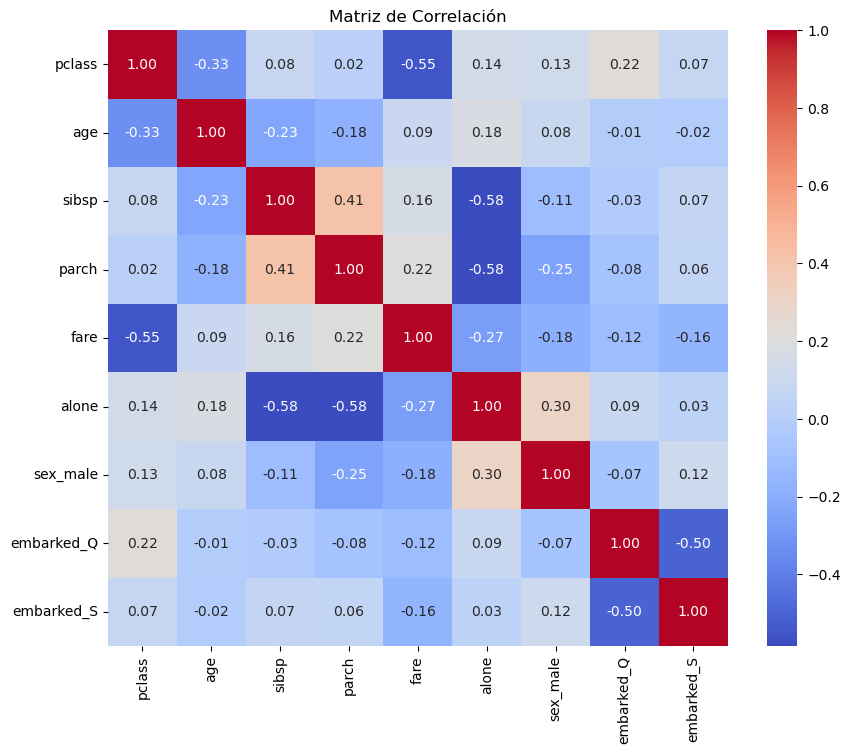

In [69]:
# Calculamos la matriz de correlación
correlation_matrix = X.corr()

# Visualizamos la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [70]:
# Visualizamos la cantidad de valores nulos por columna
print(titanic.isnull().sum())

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [71]:
# Eliminamos las columnas que no nos aportan valor
titanic = titanic.drop(['Unnamed: 0', 'deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1)

In [72]:
# Visualizamos la información del dataset después de eliminar columnas
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB
None


In [73]:
# Visualizamos la cantidad de valores nulos por columna después de eliminar columnas
print(titanic.isnull().sum())

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
alone         0
dtype: int64


In [74]:
# Imputamos los valores nulos de la columna 'age' con la media
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
# Imputamos los valores nulos de la columna 'embarked' con el valor 'S'
titanic['embarked'] = titanic['embarked'].fillna('S')

In [75]:
# Visualizamos la cantidad de valores nulos por columna después de imputar valores nulos
print(titanic.isnull().sum())


survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64


In [76]:
# Visualizamos la información del dataset después de imputar valores nulos
print(titanic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB
None


In [85]:
# Separar las características (X) y la variable objetivo (y)
X = titanic.drop('survived', axis=1)
y = titanic['survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un diccionario para almacenar las métricas de los modelos
metrics_data = {
    'Modelo': [],
    'Accuracy': [],
    'F1-score (Clase 1)': [],
    'Recall (Clase 1)': [],
    'Precision (Clase 1)': []
}

# Entrenar y evaluar el modelo de regresión logística
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
metrics_data['Modelo'].append('Regresión Logística')
metrics_data['Accuracy'].append(accuracy_score(y_test, y_pred_log))
metrics_data['F1-score (Clase 1)'].append(classification_report(y_test, y_pred_log, output_dict=True)['1']['f1-score'])
metrics_data['Recall (Clase 1)'].append(classification_report(y_test, y_pred_log, output_dict=True)['1']['recall'])
metrics_data['Precision (Clase 1)'].append(classification_report(y_test, y_pred_log, output_dict=True)['1']['precision'])

# Entrenar y evaluar el modelo de árbol de decisión
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
metrics_data['Modelo'].append('Árbol de Decisión')
metrics_data['Accuracy'].append(accuracy_score(y_test, y_pred_tree))
metrics_data['F1-score (Clase 1)'].append(classification_report(y_test, y_pred_tree, output_dict=True)['1']['f1-score'])
metrics_data['Recall (Clase 1)'].append(classification_report(y_test, y_pred_tree, output_dict=True)['1']['recall'])
metrics_data['Precision (Clase 1)'].append(classification_report(y_test, y_pred_tree, output_dict=True)['1']['precision'])

# Entrenar y evaluar el modelo de random forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
metrics_data['Modelo'].append('Random Forest')
metrics_data['Accuracy'].append(accuracy_score(y_test, y_pred_rf))
metrics_data['F1-score (Clase 1)'].append(classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'])
metrics_data['Recall (Clase 1)'].append(classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'])
metrics_data['Precision (Clase 1)'].append(classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'])

ValueError: could not convert string to float: 'male'